In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 20.5 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 91.7 MB/s eta 0:00:00:00:010:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 68.1 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:

In [ ]:
from ultralytics import YOLO

# Load the model from your checkpoint manually
model = YOLO("/kaggle/input/militr/epoch40.pt")  # Replace path

# Start a fresh training run from the pre-trained weights
model.train(
    data="/kaggle/working/fixed1_military_dataset.yaml",  # Dataset path
    epochs=100,                     # 100 NEW epochs (from this point)
    imgsz=416,                      # Image size
    batch=16,                       # Adjust based on GPU
    workers=2,                      # Adjust based on I/O capacity
    project="military_yolo8m_final",
    name="exp_fresh_from_epoch40",
    save=True,
    save_period=1,
    resume=False,                  # Start fresh, don't continue old run
    pretrained=False               # Very important: don't load default YOLO weights
)


Ultralytics 8.3.170 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed1_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/militr/epoch40.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_fresh_from_epoch402, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patie

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 17.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 68.9MB/s]


AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 1.1¬±0.1 ms, read: 8.8¬±4.4 MB/s, size: 123.9 KB)


train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [01:54<00:00, 192.14it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.2¬±0.5 ms, read: 17.1¬±17.5 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:15<00:00, 187.06it/s]


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.
Plotting labels to military_yolo8m_final/exp_fresh_from_epoch402/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final/exp_fresh_from_epoch402
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.81G     0.8012     0.5553      1.065         56        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:30<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:25<00:00,  3.65it/s]

                   all       2941       5081      0.663      0.539      0.602      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.97G     0.8308     0.5863       1.08         55        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:24<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.08it/s]

                   all       2941       5081      0.709      0.542      0.576      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.02G     0.9062     0.6709      1.109         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.03it/s]

                   all       2941       5081      0.552      0.512      0.534      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.05G     0.9961     0.7959      1.161         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.07it/s]

                   all       2941       5081      0.592      0.473       0.53      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       4.1G      1.018     0.8268      1.176         49        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.05it/s]


                   all       2941       5081       0.56      0.475      0.517      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.14G      1.021     0.8244      1.183         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.06it/s]

                   all       2941       5081      0.604      0.513      0.552      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.19G      1.017     0.8217      1.181         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.604      0.471      0.536      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.23G      1.017     0.8176      1.182         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.08it/s]

                   all       2941       5081      0.681      0.493      0.535      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.28G      1.012     0.8092      1.172         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.06it/s]

                   all       2941       5081      0.672      0.509      0.556      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.32G      1.008     0.8046      1.168         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.02it/s]

                   all       2941       5081      0.594      0.507      0.546      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.37G      1.002     0.8021      1.173         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.10it/s]

                   all       2941       5081      0.617      0.522      0.579      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.41G      1.004     0.7957      1.173         28        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.01it/s]

                   all       2941       5081       0.58      0.515      0.548       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.46G      1.002     0.7909      1.165         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.07it/s]


                   all       2941       5081      0.617      0.519      0.572      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       4.5G      1.002     0.7955      1.168         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.11it/s]

                   all       2941       5081      0.601      0.526      0.574      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.55G     0.9896     0.7785      1.163         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.11it/s]

                   all       2941       5081      0.715      0.518      0.579      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.8G     0.9844      0.768      1.164         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.14it/s]

                   all       2941       5081      0.599       0.54      0.575      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.86G     0.9839     0.7763      1.161         19        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.04it/s]


                   all       2941       5081      0.728      0.502      0.575      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.89G     0.9804      0.768      1.159         64        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.05it/s]

                   all       2941       5081      0.638      0.535      0.586      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.95G     0.9789     0.7624      1.158         21        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.00it/s]

                   all       2941       5081      0.647      0.519      0.588      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.98G     0.9656     0.7513       1.15         31        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  4.00it/s]

                   all       2941       5081      0.636      0.534      0.592      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.03G     0.9731     0.7527      1.152         57        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.98it/s]


                   all       2941       5081      0.705      0.532      0.587        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.07G     0.9665     0.7396      1.148         44        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.93it/s]

                   all       2941       5081       0.74      0.525      0.594      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.12G      0.966     0.7423       1.15         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]

                   all       2941       5081      0.629      0.531      0.584      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.38G     0.9614     0.7374       1.15         46        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.91it/s]


                   all       2941       5081      0.625      0.549      0.594      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.43G     0.9587     0.7374      1.146         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.06it/s]


                   all       2941       5081      0.641       0.55      0.593      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.46G     0.9566      0.729      1.147         41        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.10it/s]

                   all       2941       5081      0.636       0.55      0.594      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.74G     0.9473     0.7251      1.144         35        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.05it/s]

                   all       2941       5081      0.641      0.556      0.602      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.77G      0.948     0.7246      1.141         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:24<00:00,  3.83it/s]

                   all       2941       5081      0.618      0.573      0.603      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.83G     0.9447     0.7243      1.138         31        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.01it/s]

                   all       2941       5081      0.744       0.56      0.608      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.86G     0.9432     0.7155      1.139         37        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.92it/s]

                   all       2941       5081      0.732      0.562      0.601      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.91G     0.9426     0.7164      1.135         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.94it/s]

                   all       2941       5081      0.736      0.555      0.599      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.17G     0.9405     0.7094      1.133         55        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]


                   all       2941       5081      0.731      0.555      0.606      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.22G     0.9341     0.7081      1.133         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  4.00it/s]

                   all       2941       5081       0.72      0.567      0.612      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.26G     0.9342     0.6989      1.132         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]

                   all       2941       5081      0.732      0.555      0.608      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.31G     0.9277     0.6918      1.122         26        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.99it/s]


                   all       2941       5081      0.632      0.563       0.61      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.43G     0.9246     0.6916      1.124         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]

                   all       2941       5081      0.633      0.569       0.61      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.47G       0.92     0.6881      1.119         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]


                   all       2941       5081      0.742      0.558      0.609      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       6.7G     0.9175       0.68      1.118         50        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.03it/s]

                   all       2941       5081      0.728      0.562      0.608      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.75G      0.913     0.6733      1.117         31        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.93it/s]


                   all       2941       5081      0.729      0.559      0.607      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.79G     0.9081     0.6743      1.117         31        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081       0.75       0.55      0.609      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       6.9G     0.9073      0.668      1.115         46        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]

                   all       2941       5081      0.732      0.563      0.611      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.15G      0.901     0.6655      1.114         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.93it/s]

                   all       2941       5081      0.744      0.554      0.609      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.21G     0.8997     0.6615       1.11         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.92it/s]

                   all       2941       5081      0.739      0.557      0.611      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.92G     0.8968     0.6595      1.105         35        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.762      0.546       0.61      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.92G     0.8909     0.6502      1.101         41        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.94it/s]


                   all       2941       5081      0.771      0.545      0.612      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.92G     0.8867     0.6459        1.1         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.01it/s]


                   all       2941       5081      0.633      0.567      0.608      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.92G     0.8845     0.6439      1.102         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]

                   all       2941       5081      0.778      0.538       0.61      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.92G     0.8822     0.6356      1.096         63        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.08it/s]


                   all       2941       5081      0.648       0.56      0.611      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.92G     0.8742     0.6322      1.092         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.744      0.555       0.61      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.92G     0.8719      0.629      1.089         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]

                   all       2941       5081      0.761      0.546       0.61      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.95G     0.8719     0.6235      1.086         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.93it/s]

                   all       2941       5081      0.645      0.563       0.61      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.98G     0.8632     0.6183      1.087         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.99it/s]


                   all       2941       5081      0.644      0.566       0.61      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.04G     0.8647      0.621       1.09         20        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.99it/s]


                   all       2941       5081      0.671      0.546       0.61      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.07G     0.8589     0.6172      1.088         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.01it/s]


                   all       2941       5081      0.672      0.547       0.61      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.13G     0.8557     0.6081      1.086         35        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.01it/s]

                   all       2941       5081      0.667      0.549      0.609      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.38G     0.8506     0.6097       1.08         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.98it/s]

                   all       2941       5081      0.668      0.549      0.609      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.43G     0.8425     0.6028      1.083         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.99it/s]

                   all       2941       5081      0.657      0.556      0.607      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.47G       0.85     0.6036      1.084         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]


                   all       2941       5081      0.658      0.554      0.607      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.52G      0.838     0.5936      1.077         41        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]

                   all       2941       5081      0.665      0.553       0.61      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.56G     0.8335     0.5899      1.074         40        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]


                   all       2941       5081      0.663       0.55      0.607      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.61G     0.8357     0.5814       1.07         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.91it/s]


                   all       2941       5081      0.663      0.555      0.609      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.05G      0.829     0.5857      1.072         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.94it/s]

                   all       2941       5081      0.663      0.555      0.609      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       5.1G     0.8204     0.5732      1.064         22        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.663      0.557      0.609      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.14G     0.8172     0.5739      1.066         64        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.93it/s]

                   all       2941       5081      0.659       0.56      0.609      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.19G      0.819      0.572       1.07         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.00it/s]


                   all       2941       5081      0.656      0.561      0.609      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.22G     0.8113       0.56      1.062         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.655       0.56      0.607      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.28G     0.8053     0.5573      1.059         52        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.656      0.562      0.609      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.53G     0.8026     0.5542      1.054         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.97it/s]

                   all       2941       5081      0.657       0.56      0.608      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.59G     0.8002     0.5496      1.052         22        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.03it/s]

                   all       2941       5081      0.653      0.559      0.606      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.62G     0.7933     0.5465      1.044         37        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]


                   all       2941       5081      0.652      0.559      0.607      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.68G     0.7878     0.5415      1.048         25        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.08it/s]

                   all       2941       5081      0.651       0.56      0.608      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.71G     0.7859     0.5361      1.047         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.08it/s]

                   all       2941       5081      0.651      0.562      0.607      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.76G     0.7768     0.5312      1.043         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.10it/s]

                   all       2941       5081      0.647      0.564      0.608      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.02G     0.7754     0.5248       1.04         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.98it/s]


                   all       2941       5081       0.65      0.561      0.608      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.07G     0.7787     0.5259      1.038         50        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]

                   all       2941       5081      0.652       0.56      0.608      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.1G     0.7673     0.5163       1.04         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.04it/s]

                   all       2941       5081      0.652      0.559      0.608      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.16G     0.7647     0.5168      1.029         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  4.00it/s]

                   all       2941       5081       0.65       0.56      0.609      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.34G      0.757     0.5133      1.031         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.08it/s]

                   all       2941       5081       0.65      0.561      0.609      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.39G     0.7567     0.5067       1.03         31        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.04it/s]

                   all       2941       5081      0.646      0.562       0.61      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.42G     0.7527     0.5084      1.028         53        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.94it/s]

                   all       2941       5081      0.651       0.56      0.609      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.56G     0.7461     0.5051      1.027         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.04it/s]

                   all       2941       5081      0.652      0.559      0.609      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.82G     0.7382      0.494      1.024         26        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  4.00it/s]

                   all       2941       5081      0.651       0.56      0.609      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.87G     0.7337     0.4917      1.023         35        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]

                   all       2941       5081      0.654      0.559      0.609      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       6.9G     0.7348     0.4881      1.018         41        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.05it/s]

                   all       2941       5081      0.654      0.558      0.608      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.96G     0.7258     0.4838      1.017         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.07it/s]

                   all       2941       5081      0.654      0.558      0.608      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.41G     0.5825     0.3173     0.9214         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.01it/s]

                   all       2941       5081      0.656      0.556      0.609      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.41G     0.5768     0.3146     0.9195         10        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.93it/s]

                   all       2941       5081      0.655      0.556       0.61      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.41G     0.5683     0.3081     0.9188         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.96it/s]


                   all       2941       5081       0.65      0.554      0.609      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.43G     0.5632     0.3037     0.9151         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  4.00it/s]


                   all       2941       5081      0.648      0.558      0.609      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.46G     0.5586     0.3002     0.9113         20        416:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 854/1374 [03:57<02:23,  3.63it/s]

In [ ]:
from ultralytics import YOLO

# Load the model from your checkpoint manually
model = YOLO("/kaggle/input/wowwww/last (5).pt")  # Replace path

# Start a fresh training run from the pre-trained weights
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",  # Dataset path
    epochs=100,                     # 100 NEW epochs (from this point)
    imgsz=416,                      # Image size
    batch=16,                       # Adjust based on GPU
    workers=2,                      # Adjust based on I/O capacity
    project="military_yolo8m_final",
    name="exp_fresh_from_epoch40",
    save=True,
    save_period=1,
    resume=False,                  # Start fresh, don't continue old run
    pretrained=False               # Very important: don't load default YOLO weights
)


In [2]:
yaml_content = """\
train: /kaggle/input/militr/Military/military_object_dataset/train/images
val: /kaggle/input/militr/Military/military_object_dataset/val/images
test: /kaggle/input/militr/Military/military_object_dataset/test/images

nc: 12
names: [
  "camouflage_soldier", "weapon", "military_tank", "military_truck", "military_vehicle",
  "civilian", "soldier", "civilian_vehicle", "military_artillery", "trench",
  "military_aircraft", "military_warship"
]
"""

with open("/kaggle/working/fixed_military_dataset.yaml", "w") as f:
    f.write(yaml_content)


In [6]:
from ultralytics import YOLO

# Load model from epoch95
model = YOLO("/kaggle/input/helloo/epoch95.pt")  # Replace path

# Train 30 more epochs (from 95 ‚Üí 125)
model.train(
    data="/kaggle/working/fixed1_military_dataset.yaml",
    epochs=30,  # Just 30 more epochs
    pretrained=True,  # Use pretrained weights from epoch95.pt
    resume=False,     # Don't resume logs/checkpoints
    project="military_yolo8m_final",
    name="exp_continue_95_to_125",
    exist_ok=True
)


Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed1_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/helloo/epoch95.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_continue_95_to_125, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:24<00:00, 888.16it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 144.7¬±71.7 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:03<00:00, 830.60it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to military_yolo8m_final/exp_continue_95_to_125/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final/exp_continue_95_to_125
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.11G     0.7033     0.4562      1.012         56        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:58<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.28it/s]

                   all       2941       5081      0.637      0.541      0.597      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.16G     0.7442      0.493      1.026         55        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:48<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.24it/s]

                   all       2941       5081       0.65      0.525      0.583      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.21G     0.8224     0.5802      1.063         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]

                   all       2941       5081      0.574      0.484      0.521       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.24G     0.9223     0.7055      1.115         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.35it/s]


                   all       2941       5081      0.618      0.603      0.557      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       4.3G     0.9454       0.73      1.132         49        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]

                   all       2941       5081      0.621      0.501      0.548      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.34G     0.9483     0.7302      1.138         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]


                   all       2941       5081      0.701      0.502      0.551      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.38G     0.9411     0.7233      1.132         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]


                   all       2941       5081      0.626      0.498      0.564      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.59G     0.9344       0.71      1.131         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.46it/s]


                   all       2941       5081        0.7      0.523      0.564      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.64G     0.9265     0.6978       1.12         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.34it/s]


                   all       2941       5081      0.713      0.503       0.56      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.87G       0.92      0.686      1.119         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]


                   all       2941       5081      0.655      0.511      0.571      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.92G      0.908     0.6764      1.111         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.40it/s]


                   all       2941       5081      0.604      0.538      0.575       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.18G        0.9      0.669      1.114         28        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]


                   all       2941       5081      0.608      0.548      0.575      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.22G     0.8922     0.6549      1.103         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.47it/s]


                   all       2941       5081      0.714      0.543      0.578      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.26G     0.8866       0.65      1.098         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.49it/s]


                   all       2941       5081      0.629      0.539      0.587      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.31G      0.872     0.6308      1.092         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]


                   all       2941       5081      0.635      0.523      0.577      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.35G     0.8576     0.6146       1.09         38        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.613      0.541      0.578      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.41G      0.849     0.6086      1.084         19        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:45<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:24<00:00,  3.78it/s]


                   all       2941       5081      0.746       0.54      0.585        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.44G      0.841     0.5989      1.078         64        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.92it/s]


                   all       2941       5081      0.737       0.55        0.6      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       5.5G      0.832     0.5835      1.073         21        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:45<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.32it/s]


                   all       2941       5081       0.74      0.548      0.599      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.54G     0.8135     0.5648       1.06         31        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.18it/s]


                   all       2941       5081      0.838      0.539      0.593       0.41
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.66G     0.7372     0.4343     0.9988         15        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.26it/s]


                   all       2941       5081      0.736      0.545      0.595      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.88G     0.7142     0.4158     0.9899         10        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.22it/s]

                   all       2941       5081      0.861      0.531      0.597      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.93G     0.6983     0.4026      0.985         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]

                   all       2941       5081      0.834      0.543      0.595      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.97G     0.6841     0.3929     0.9768         23        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]


                   all       2941       5081      0.834      0.555      0.599      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.02G     0.6721      0.379     0.9671         12        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.50it/s]


                   all       2941       5081       0.86       0.53      0.596      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.27G     0.6567     0.3669     0.9614         13        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.50it/s]


                   all       2941       5081      0.848      0.547      0.596      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.32G      0.638     0.3552     0.9529          9        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.46it/s]

                   all       2941       5081      0.835      0.552      0.596       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.58G     0.6216     0.3452     0.9451         13        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.37it/s]

                   all       2941       5081      0.859      0.529      0.598      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.63G     0.6114     0.3323     0.9386         20        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.37it/s]

                   all       2941       5081      0.837      0.547      0.598      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.67G      0.598     0.3223     0.9328         24        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.40it/s]

                   all       2941       5081      0.729      0.558      0.597      0.416



30 epochs completed in 3.055 hours.
Optimizer stripped from military_yolo8m_final/exp_continue_95_to_125/weights/last.pt, 52.0MB
Optimizer stripped from military_yolo8m_final/exp_continue_95_to_125/weights/best.pt, 52.0MB

Validating military_yolo8m_final/exp_continue_95_to_125/weights/best.pt...
Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.26it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081       0.86       0.53      0.596      0.417
    camouflage_soldier        385        510       0.85      0.731      0.814      0.468
                weapon        222        358      0.846      0.629      0.717      0.553
         military_tank        938       1787      0.862       0.86      0.889      0.647
        military_truck         84        148      0.754      0.635      0.663       0.42
      military_vehicle        149        307      0.733      0.464      0.603      0.454
              civilian          1          1          1          0          0          0
               soldier        420        745      0.881      0.686      0.793       0.54
      civilian_vehicle         18         42      0.784      0.405      0.492       0.29
    military_artillery         85        117       0.81       0.59      0.677      0.488
                trench          1          3          1          0          0          0
     military_aircraf

Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787315fd4950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [ ]:
from ultralytics import YOLO

# Load model from epoch95
model = YOLO("yolov8l.pt")  # Replace path

# Train 30 more epochs (from 95 ‚Üí 125)
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",
    epochs=30,  # Just 30 more epochs
      # Use pretrained weights from epoch95.pt
    resume=False,     # Don't resume logs/checkpoints
    project="Yolo8_new1",
    name="model_new1",
    exist_ok=True
)


Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=model_new1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:42<00:00, 519.89it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 85.7¬±74.2 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:05<00:00, 524.42it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to Yolo8_new1/model_new1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Yolo8_new1/model_new1
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        10G      1.098       1.54       1.34         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:41<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:53<00:00,  1.72it/s]


                   all       2941       5081      0.594      0.453      0.452      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.78G      1.172      1.255      1.384         54        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:51<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081       0.51      0.379      0.375      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.34G      1.325       1.49      1.479         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:46<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]


                   all       2941       5081      0.513      0.259      0.254      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       9.5G      1.387      1.608      1.534         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]


                   all       2941       5081      0.571      0.316      0.319       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.53G      1.323      1.472      1.492         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081      0.536      0.388      0.376      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       9.4G      1.266      1.343      1.452         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:46<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081      0.624      0.392      0.431      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.52G      1.219      1.255      1.417         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:46<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.561      0.433      0.446      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.38G      1.189      1.192      1.397         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081       0.53      0.454      0.436      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       9.5G      1.156      1.134      1.371         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:47<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081      0.585      0.473      0.487      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.42G       1.13      1.088      1.354         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:47<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.77it/s]

                   all       2941       5081      0.634      0.474      0.509       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.61G      1.103      1.044      1.337         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081      0.617       0.48      0.512      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.39G      1.091      1.014      1.328         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:46<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.615      0.496      0.517      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.65G      1.065     0.9697      1.314         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:47<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081      0.652      0.495      0.534      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.42G      1.056     0.9584      1.302         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:47<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.656      0.514      0.557      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.55G      1.036     0.9137      1.288         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:49<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.77it/s]

                   all       2941       5081      0.653      0.514      0.549      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.49G      1.014      0.888      1.278         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081       0.69      0.514      0.569      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.68G     0.9992     0.8663      1.268         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.692      0.504      0.561      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.49G     0.9852     0.8372      1.253         64        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:49<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.687      0.552      0.588        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       9.7G     0.9699     0.8082      1.246         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.684      0.544       0.59      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       9.5G     0.9471     0.7829      1.229         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.77it/s]

                   all       2941       5081      0.717      0.547      0.605      0.412


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.67G     0.8927     0.6331      1.213         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:42<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.75it/s]

                   all       2941       5081      0.609      0.555      0.599       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.48G     0.8706      0.599        1.2         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:42<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.76it/s]

                   all       2941       5081      0.719      0.557      0.608      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.18G     0.8481     0.5794      1.186         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:41<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:51<00:00,  1.77it/s]

                   all       2941       5081      0.709      0.567      0.608      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       9.5G      0.829      0.556      1.177         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:40<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.77it/s]

                   all       2941       5081      0.725      0.559      0.614      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.49G     0.8123     0.5316      1.162         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:42<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:52<00:00,  1.77it/s]

                   all       2941       5081      0.627      0.578      0.616      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.55G      0.792     0.5093      1.149         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:41<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:51<00:00,  1.77it/s]

                   all       2941       5081      0.649      0.561      0.618       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.56G     0.7714     0.4827      1.129          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:38<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:51<00:00,  1.77it/s]

                   all       2941       5081      0.638      0.567      0.619      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.37G     0.7502     0.4645      1.116         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:40<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:51<00:00,  1.77it/s]

                   all       2941       5081      0.636      0.566      0.621      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       9.6G     0.7367     0.4466      1.107         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:39<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:51<00:00,  1.78it/s]

                   all       2941       5081      0.629      0.583      0.625      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       9.5G     0.7184     0.4279      1.096         24        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [19:37<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:51<00:00,  1.78it/s]

                   all       2941       5081      0.625      0.579      0.624      0.435



30 epochs completed in 10.326 hours.
Optimizer stripped from Yolo8_new1/model_new1/weights/last.pt, 87.6MB
Optimizer stripped from Yolo8_new1/model_new1/weights/best.pt, 87.6MB

Validating Yolo8_new1/model_new1/weights/best.pt...
Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,615,860 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 74/92 [00:40<00:12,  1.46it/s]

In [ ]:
from ultralytics import YOLO

# Load the last trained weights
model = YOLO("/kaggle/input/militry/last (9).pt")  # change path if needed

# Train 30 more epochs (so total will be 60)
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",  # same YAML as before
    epochs=30,  # This is additional, not cumulative
    save=True,           # save checkpoints
    save_period=1,       # save every epoch
    project="Yolo8_more_training",
    name="model_epoch31_60",
    exist_ok=True
)


Ultralytics 8.3.179 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/militry/last (9).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=model_epoch31_60, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:41<00:00, 532.81it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 73.9¬±57.1 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:06<00:00, 481.89it/s]


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.
Plotting labels to Yolo8_more_training/model_epoch31_60/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Yolo8_more_training/model_epoch31_60
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.68G     0.8445     0.6479      1.178         55        640:  29%|‚ñà‚ñà‚ñâ       | 403/1374 [06:16<15:18,  1.06it/s]

In [4]:
from ultralytics import YOLO

# Load the last trained weights
model = YOLO("/kaggle/input/newmili/last (10).pt")  # change path if needed

# Train 30 more epochs (so total will be 60)
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",  # same YAML as before
    epochs=50,  # This is additional, not cumulative
    save=True,           # save checkpoints
    save_period=1,       # save every epoch
    project="Yolo8_more_training",
    name="model_epoch61_110",
    exist_ok=True
)


Ultralytics 8.3.179 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/newmili/last (10).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=model_epoch61_110, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [01:47<00:00, 204.45it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 16.7¬±16.9 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:14<00:00, 200.19it/s]


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.
Plotting labels to Yolo8_more_training/model_epoch61_110/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Yolo8_more_training/model_epoch61_110
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       9.5G      0.763     0.5457       1.12         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:46<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.62it/s]

                   all       2941       5081      0.745      0.566      0.623      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.76G     0.7857      0.571      1.132         54        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:44<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.623      0.556      0.603      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.34G      0.858     0.6564      1.167         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.563       0.52      0.546      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       9.5G     0.9488     0.7858      1.225         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.562      0.519      0.545      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.53G     0.9629     0.8049      1.239         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:39<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.527      0.469      0.513      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.39G     0.9612     0.7992      1.238         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081        0.6      0.495      0.552      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.27G     0.9536     0.7921      1.232         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.603       0.51      0.566      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.51G     0.9534     0.7767      1.235         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:40<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.707      0.522      0.578      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.51G     0.9395     0.7576      1.219         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:37<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.711       0.52      0.582      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.48G     0.9341     0.7497      1.217         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.611      0.521      0.583      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.56G     0.9244     0.7443      1.214         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.705      0.537      0.583      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.47G     0.9203     0.7361      1.212         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:37<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.615      0.539      0.578      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.29G     0.9114     0.7189      1.205         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:37<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.586       0.55      0.584      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       9.5G      0.911      0.718      1.201         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.586       0.55      0.588      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.47G     0.8976     0.7025      1.196         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:37<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.623      0.537      0.594      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.49G     0.8884     0.6874      1.188         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.645      0.536      0.601      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.32G     0.8853     0.6875       1.19         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:39<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081       0.62      0.541      0.597      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.48G     0.8784     0.6758      1.181         64        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:44<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.634      0.565      0.606      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.39G     0.8716     0.6652       1.18         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:43<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.651      0.551      0.614      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.48G     0.8582       0.65      1.171         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:40<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.607      0.572      0.612      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.47G     0.8673     0.6704       1.18         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.633      0.553       0.61      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.49G     0.8587     0.6561      1.169         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:42<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081        0.7      0.576      0.609      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       9.5G     0.8531     0.6476      1.167         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:55<00:00,  1.64it/s]

                   all       2941       5081      0.736      0.559      0.626      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.37G     0.8475     0.6376       1.16         47        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.702       0.59      0.619      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.57G     0.8411     0.6313      1.159         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:39<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:55<00:00,  1.64it/s]

                   all       2941       5081      0.626      0.578      0.622      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.51G     0.8287     0.6152      1.149         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:40<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.644      0.594      0.628      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.59G     0.8221     0.6055      1.145         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:41<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.63it/s]

                   all       2941       5081      0.645      0.575      0.631      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.54G      0.816      0.599      1.143         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.638      0.578      0.627      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.54G     0.8069      0.592      1.141         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:40<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.631      0.586      0.628      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.37G     0.7987     0.5807      1.133         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:40<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.653      0.576      0.633      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.65G     0.7887     0.5706      1.126         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [21:39<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:56<00:00,  1.64it/s]

                   all       2941       5081      0.639      0.584      0.638      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.52G     0.7811     0.5598      1.124         47        640:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 754/1374 [11:54<09:47,  1.06it/s]


KeyboardInterrupt: 

In [6]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/kaggle/input/wowwww/best (2).pt")

# Run validation (on the validation set from the dataset YAML)
metrics = model.val(data="/kaggle/working/fixed_military_dataset.yaml", imgsz=416)

# Access results
print(metrics.box.map)       # mAP@0.5
print(metrics.box.map50)     # mAP@0.5 (same as above)
print(metrics.box.map75)     # mAP@0.75
print(metrics.box.maps)      # list of mAP per class


Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs


val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 31.5¬±22.0 MB/s, size: 106.3 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:08<00:00, 337.36it/s]


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 184/184 [00:32<00:00,  5.66it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081       0.86      0.531      0.596      0.418
    camouflage_soldier        385        510       0.85      0.731      0.814      0.468
                weapon        222        358      0.845      0.628      0.717      0.554
         military_tank        938       1787      0.862      0.862      0.889      0.647
        military_truck         84        148      0.755      0.642      0.666      0.419
      military_vehicle        149        307       0.73      0.466      0.604      0.456
              civilian          1          1          1          0          0          0
               soldier        420        745      0.881      0.688      0.792       0.54
      civilian_vehicle         18         42      0.783      0.405      0.491      0.293
    military_artillery         85        117      0.819       0.59      0.677      0.488
                trench          1          3          1          0          0          0
     military_aircraf

In [8]:
!yolo stats data=/kaggle/working/fixed_military_dataset.yaml


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 907, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 498, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'stats' is not a valid YOLO argument. Similar arguments are i.e. ['task=detect', 'settings=<function entrypoint.<locals>.<lambda> at 0x79af51210d60>'].

    Arguments received: ['yolo', 'stats', 'data=/kaggle/working/fixed_military_dataset.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['pose', 'detect', 'classify', 'segment', 'obb']
                MODE (required) is one of ['train', 'export', 'track', 'val', 'predict', 'benchmark']
        

In [6]:
from ultralytics import YOLO

# Load a small YOLOv8 model (you can change to yolov8s.pt or yolov8m.pt if needed)
model = YOLO("yolov8m.pt")

# Start training
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",  # ‚úÖ Your .yaml path
    epochs=50,
    imgsz=640,
    batch=16,
    save_period=1,
    project="/kaggle/working",  # üëà Outputs will go here
    name="military_yolo"
)


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.184 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=military_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 1.0¬±1.1 ms, read: 31.4¬±26.9 MB/s, size: 123.9 KB)


train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [01:03<00:00, 343.87it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 27.2¬±18.7 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:09<00:00, 298.91it/s]


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.
Plotting labels to /kaggle/working/military_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/military_yolo
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.16G      1.144      1.608      1.343         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:37<00:00,  2.46it/s]

                   all       2941       5081       0.53      0.415      0.423      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.26G      1.176      1.239      1.348         54        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:13<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.53it/s]

                   all       2941       5081      0.576      0.358      0.379       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.21G      1.317      1.464      1.441         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.51it/s]


                   all       2941       5081      0.526      0.271      0.279      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.29G      1.388      1.583      1.498         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]


                   all       2941       5081       0.47      0.312      0.292      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.28G       1.33      1.464       1.46         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081       0.54      0.339       0.35      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.27G      1.283      1.355      1.427         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.52it/s]

                   all       2941       5081      0.632      0.377       0.42      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.29G       1.24       1.28      1.402         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.613      0.415       0.45      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       6.3G      1.211      1.215      1.381         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.52it/s]

                   all       2941       5081      0.545      0.459      0.447      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.29G      1.184      1.168      1.354         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.53it/s]

                   all       2941       5081       0.57      0.469      0.468      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.29G       1.16      1.126      1.339         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.618      0.456      0.496      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.28G      1.137      1.097       1.33         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.604      0.473      0.497      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.27G      1.127      1.066       1.32         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081       0.61      0.505      0.515      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.36G      1.107      1.028      1.307         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.52it/s]

                   all       2941       5081      0.643      0.482       0.53      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.31G      1.099      1.018      1.299         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.647      0.508      0.547      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.27G      1.081      0.985      1.287         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.618      0.514      0.531      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.28G      1.069     0.9599      1.278         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.646      0.527      0.549      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.28G      1.058       0.95      1.275         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.627      0.523      0.542      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.28G      1.046     0.9219      1.258         64        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.683      0.525      0.573      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.23G      1.041     0.9018      1.252         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.663      0.533      0.567      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.23G      1.021     0.8832      1.241         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081       0.67      0.535      0.569      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.26G      1.019      0.879      1.244         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.657      0.532      0.569      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       6.3G      1.003     0.8566       1.23         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.672      0.552      0.578      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.28G     0.9986     0.8474      1.229         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.704      0.531      0.592      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.52G     0.9887      0.828      1.223         47        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.52it/s]

                   all       2941       5081      0.702      0.557        0.6      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.27G     0.9831     0.8197       1.22         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.728      0.535      0.598       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.27G     0.9713     0.7991       1.21         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.716      0.545      0.602      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.27G     0.9589     0.7806      1.201         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.717      0.552      0.606      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.28G      0.955     0.7754      1.202         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081      0.719      0.556      0.609       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.27G     0.9459     0.7627      1.196         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.716      0.564      0.611      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.27G      0.936     0.7461      1.192         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081      0.715       0.57      0.614      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.39G     0.9248     0.7308      1.183         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.725      0.561       0.62      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.29G     0.9155     0.7199      1.179         55        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.615      0.571       0.62      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.57G     0.9066     0.7115       1.17         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.718      0.574      0.621      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.3G     0.8997     0.6937      1.166         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081      0.613      0.585      0.625      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.26G     0.8922     0.6809       1.16         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.614      0.585      0.622      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.27G     0.8787     0.6759      1.155         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.57it/s]

                   all       2941       5081      0.628      0.568      0.621      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.28G     0.8727     0.6651      1.151         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.626      0.573      0.622      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.32G     0.8618     0.6471      1.139         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.621      0.578      0.623      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.27G     0.8497      0.637      1.138         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.57it/s]

                   all       2941       5081      0.625      0.579      0.623      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       6.3G     0.8419     0.6295      1.133         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081      0.626      0.578      0.625      0.437


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.28G     0.7698     0.4852      1.093         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.633      0.576      0.625      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.29G     0.7511     0.4664      1.086         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.639      0.571      0.625      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.26G     0.7381      0.454      1.078         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.637      0.571      0.625      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.28G     0.7268     0.4399      1.065         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081      0.638      0.568      0.625      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.26G     0.7138     0.4281      1.056         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.54it/s]

                   all       2941       5081      0.636      0.568      0.624      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.27G     0.6969      0.416      1.051         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.56it/s]

                   all       2941       5081      0.636      0.569      0.624      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.27G     0.6864     0.4055      1.043         24        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081       0.64      0.568      0.623      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.28G     0.6747     0.3934      1.036         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.638       0.57      0.624      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.27G     0.6628      0.385       1.03         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:35<00:00,  2.56it/s]

                   all       2941       5081      0.635      0.572      0.623      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.28G     0.6566     0.3792      1.024         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [13:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:36<00:00,  2.55it/s]

                   all       2941       5081      0.635      0.572      0.622      0.437



50 epochs completed in 11.477 hours.
Optimizer stripped from /kaggle/working/military_yolo/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/military_yolo/weights/best.pt, 52.0MB

Validating /kaggle/working/military_yolo/weights/best.pt...
Ultralytics 8.3.184 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:37<00:00,  2.46it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081      0.638      0.567      0.625      0.438
    camouflage_soldier        385        510      0.811      0.802      0.843      0.497
                weapon        222        358      0.798      0.662      0.725      0.541
         military_tank        938       1787      0.839      0.896      0.897      0.662
        military_truck         84        148      0.708      0.705      0.735      0.497
      military_vehicle        149        307      0.693      0.534       0.64      0.496
              civilian          1          1          0          0    0.00321   0.000321
               soldier        420        745      0.819      0.722      0.821      0.524
      civilian_vehicle         18         42      0.651      0.452      0.595      0.334
    military_artillery         85        117      0.756      0.581      0.674      0.482
                trench          1          3          0          0          0          0
     military_aircraf

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ddcd0f94910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [6]:
from ultralytics import YOLO

# Load your previous best/last checkpoint as pretrained weights
model = YOLO("/kaggle/input/8mmili/last (12).pt")   # path to your last weights

# Start new training (fine-tuning) for 50 more epochs
results = model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",
    epochs=50,              # this means 50 MORE epochs
    batch=16,               # adjust if OOM
    imgsz=640,
    workers=2,
    save_period=1,          # save every epoch
    project="runs/train",
    name="exp_yolov8m_contd"  # new experiment name
)


Ultralytics 8.3.184 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/8mmili/last (12).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_yolov8m_contd, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:42<00:00, 517.33it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 88.4¬±74.6 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:05<00:00, 580.04it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to runs/train/exp_yolov8m_contd/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp_yolov8m_contd
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.45G     0.7907     0.5673      1.105         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:56<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:33<00:00,  2.72it/s]

                   all       2941       5081      0.619      0.577      0.613      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.46G     0.8314     0.6147      1.124         54        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:47<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.715      0.541      0.595      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       6.4G     0.9127     0.7224      1.168         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:44<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081      0.568      0.506      0.533      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.47G      1.009     0.8639      1.224         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.585      0.479      0.532      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       6.5G       1.02     0.8794      1.235         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081      0.646      0.481      0.521      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.47G      1.017     0.8732      1.238         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081      0.664      0.504      0.538      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       6.5G      1.009     0.8635      1.232         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.588        0.5      0.546      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       6.5G      1.008     0.8485      1.231         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.588      0.517      0.547      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.48G     0.9945     0.8342      1.217         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.687      0.514      0.568      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.49G     0.9867     0.8199      1.216         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.596      0.518      0.573      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.47G     0.9761     0.8145      1.212         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.607      0.525      0.582      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.47G     0.9746     0.8057      1.209         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081      0.673      0.529      0.574      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.56G     0.9653      0.786      1.202         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081      0.706      0.506      0.581      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.51G     0.9625     0.7829      1.198         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081       0.62      0.518      0.575      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.47G     0.9497     0.7662       1.19         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.734      0.518      0.592      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.49G      0.943     0.7544      1.188         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081      0.739      0.527      0.594      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.49G     0.9363     0.7463      1.184         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081      0.733      0.522      0.586      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.48G     0.9302     0.7354      1.175         64        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081       0.73      0.535      0.598      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.44G     0.9215     0.7272      1.175         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.611      0.554      0.594       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.45G     0.9102     0.7088      1.164         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.741      0.549      0.608      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.47G     0.9102     0.7102      1.167         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.86it/s]

                   all       2941       5081      0.713      0.553      0.606      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       6.5G     0.8968     0.6945      1.157         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.702      0.581       0.61       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.48G     0.8925     0.6881      1.156         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.608      0.566      0.608      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.72G     0.8849     0.6768      1.154         47        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.86it/s]

                   all       2941       5081      0.716      0.565      0.618      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.47G     0.8795     0.6747      1.151         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.615       0.57      0.613      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.47G     0.8709     0.6585      1.144         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.752      0.538      0.612      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.47G     0.8599     0.6465      1.138         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081       0.61      0.576      0.616      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.49G      0.858     0.6449       1.14         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081      0.722      0.561      0.616       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.48G     0.8518     0.6364      1.135         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.726       0.56      0.621      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.46G     0.8421     0.6237      1.131         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.616      0.574      0.619      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.57G     0.8339     0.6134      1.124         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.614      0.586      0.622      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.48G     0.8253     0.6049       1.12         55        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081       0.61      0.583       0.62      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.78G      0.819      0.598      1.113         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.85it/s]

                   all       2941       5081      0.627      0.589      0.624      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.5G     0.8144     0.5841       1.11         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081       0.63      0.584       0.63      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.46G     0.8085     0.5787      1.105         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081       0.65      0.565      0.629       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.46G     0.7965     0.5719      1.101         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.86it/s]

                   all       2941       5081       0.63      0.578      0.625      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.49G     0.7914     0.5653      1.097         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.85it/s]

                   all       2941       5081      0.626      0.575      0.626      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       6.5G     0.7841     0.5533      1.087         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.85it/s]

                   all       2941       5081       0.61      0.597      0.628      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.47G     0.7723     0.5445      1.086         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.621      0.589      0.628      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       6.5G     0.7647     0.5394      1.081         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.81it/s]

                   all       2941       5081      0.628      0.582      0.624      0.441


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.49G     0.6814     0.4042      1.029         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.84it/s]

                   all       2941       5081      0.632      0.578      0.624       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       6.5G     0.6657     0.3907       1.02         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081       0.64      0.574      0.623      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.47G     0.6534     0.3796      1.015         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.83it/s]

                   all       2941       5081      0.644      0.568      0.622      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.48G     0.6455     0.3725       1.01         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.82it/s]

                   all       2941       5081       0.65      0.566      0.621       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.47G     0.6317     0.3618      1.003         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.739      0.567      0.621       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.48G     0.6172     0.3532     0.9963         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:41<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.79it/s]

                   all       2941       5081      0.644      0.569       0.62       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.46G     0.6109     0.3468     0.9922         24        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:41<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.79it/s]

                   all       2941       5081      0.644      0.568       0.62       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.46G     0.6011     0.3383     0.9869         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:41<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:33<00:00,  2.77it/s]

                   all       2941       5081      0.643      0.568      0.619       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.47G     0.5907     0.3306     0.9818         16        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:41<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:33<00:00,  2.78it/s]

                   all       2941       5081      0.642      0.568      0.619       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.47G      0.585     0.3248     0.9776         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [11:41<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:32<00:00,  2.80it/s]

                   all       2941       5081      0.738      0.565      0.618       0.44



50 epochs completed in 10.233 hours.
Optimizer stripped from runs/train/exp_yolov8m_contd/weights/last.pt, 52.0MB
Optimizer stripped from runs/train/exp_yolov8m_contd/weights/best.pt, 52.0MB

Validating runs/train/exp_yolov8m_contd/weights/best.pt...
Ultralytics 8.3.184 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:33<00:00,  2.71it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081      0.631      0.584       0.63      0.441
    camouflage_soldier        385        510      0.795      0.829      0.855      0.493
                weapon        222        358      0.803      0.696       0.74      0.557
         military_tank        938       1787      0.817      0.908      0.896      0.666
        military_truck         84        148      0.668      0.681      0.717      0.485
      military_vehicle        149        307      0.656      0.554      0.633      0.495
              civilian          1          1          0          0          0          0
               soldier        420        745      0.776      0.753      0.817      0.534
      civilian_vehicle         18         42      0.729        0.5      0.626      0.335
    military_artillery         85        117      0.757      0.614      0.707      0.497
                trench          1          3          0          0          0          0
     military_aircraf

In [11]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/49mili/epoch49 (2).pt")  # load checkpoint as pretrained

results = model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",
    epochs=100,          # <-- set the TOTAL epochs you want
    batch=16,
    imgsz=640,
    workers=2,
    save_period=1,
    resume=True,
    project="runs/train",
    name="exp_yolov8m_contd"
)


Ultralytics 8.3.184 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/49mili/epoch49 (2).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_yolov8m_contd, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:37<00:00, 586.70it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 84.7¬±71.6 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:05<00:00, 583.26it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to runs/train/exp_yolov8m_contd/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Resuming training /kaggle/input/49mili/epoch49 (2).pt from epoch 51 to 50 total epochs
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp_yolov8m_contd
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/50      7.74G     0.7083     0.4897      1.055         72        640:  35%|‚ñà‚ñà‚ñà‚ñç      | 475/1374 [04:03<07:40,  1.95it/s]


KeyboardInterrupt: 

In [1]:
pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 82.6 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 63.5 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00

In [5]:
from ultralytics import YOLO

# Load model from epoch95
model = YOLO("/kaggle/input/helloo/epoch95.pt")  # Replace path

# Train 30 more epochs (from 95 ‚Üí 125)
model.train(
    data="/kaggle/working/fixed1_military_dataset.yaml",
    epochs=30,  # Just 30 more epochs
    pretrained=True,  # Use pretrained weights from epoch95.pt
    resume=False,     # Don't resume logs/checkpoints
    project="military_yolo8m_final",
    name="exp_continue_95_to_125",
    exist_ok=True
)


Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed1_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/helloo/epoch95.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_continue_95_to_125, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 1.8¬±3.2 ms, read: 27.2¬±17.6 MB/s, size: 123.9 KB)


train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 3849 images, 266 backgrounds, 0 corrupt:  18%|‚ñà‚ñä        | 3849/21978 [00:12<01:00, 301.75it/s]


KeyboardInterrupt: 

In [18]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/kaggle/input/dataset/best (3).pt")

# Run validation (on the validation set from the dataset YAML)
metrics = model.val(data="/kaggle/working/fixed1_military_dataset.yaml", imgsz=416)

# Access results
print(metrics.box.map)       # mAP@0.5
print(metrics.box.map50)     # mAP@0.5 (same as above)
print(metrics.box.map75)     # mAP@0.75
print(metrics.box.maps)      # list of mAP per class


Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 230.9¬±235.2 MB/s, size: 153.3 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:04<00:00, 683.36it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 184/184 [00:32<00:00,  5.62it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081      0.669      0.568       0.62      0.429
    camouflage_soldier        385        510      0.873      0.806      0.848       0.49
                weapon        222        358      0.784      0.679      0.735      0.562
         military_tank        938       1787       0.83      0.899      0.892      0.643
        military_truck         84        148      0.713      0.703      0.714       0.48
      military_vehicle        149        307      0.694      0.515      0.627      0.469
              civilian          1          1          0          0     0.0663    0.00663
               soldier        420        745       0.82      0.744      0.804      0.531
      civilian_vehicle         18         42      0.904        0.5      0.538      0.307
    military_artillery         85        117       0.82      0.547      0.674       0.48
                trench          1          3          0          0          0          0
     military_aircraf

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# YOLO dataset base path
base_path = "/kaggle/input/militr/Military/military_object_dataset"
image_types = ('.jpg', '.jpeg', '.png')

# Class names
class_names = [
    "camouflage_soldier", "weapon", "military_tank", "military_truck", "military_vehicle",
    "civilian", "soldier", "civilian_vehicle", "military_artillery", "trench", "military_aircraft", "military_warship"
]


In [8]:
# ===============================
# SAFE YOLOv8 TRAINING SCRIPT
# ===============================

import torch

# --- Fix torch.load recursion safely ---
if not hasattr(torch, "_orig_load_no_patch"):
    torch._orig_load_no_patch = torch.load  # backup original function

def torch_load_fixed(*args, **kwargs):
    if "weights_only" not in kwargs:
        kwargs["weights_only"] = False
    return torch._orig_load_no_patch(*args, **kwargs)

torch.load = torch_load_fixed

# --- Import YOLO ---
from ultralytics import YOLO

# --- Your dataset path ---
DATASET_PATH = "/kaggle/working/fixed_military_dataset.yaml"  # change this if needed

# --- Choose YOLOv8L or YOLOv8X ---
MODEL_PATH = "yolov8l.pt"  # change to yolov8x.pt if you want YOLOv8X

# --- Load the model ---
model = YOLO(MODEL_PATH)

# --- Train ---
model.train(
    data=DATASET_PATH,
    epochs=30,
    imgsz=640,
    batch=16,
    device=0,
    workers=2,
    project="/kaggle/working/runs",  # save results here
    name="yolo_train",
    pretrained=True,
    augment=True,          # enable augmentations
    mosaic=1.0,             # mosaic augmentation
    mixup=0.2,              # mixup augmentation
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4  # color augmentations
)

# --- Evaluate after training ---
metrics = model.val()
print(metrics)

# --- Export trained model (optional) ---
model.export(format="onnx")


RecursionError: maximum recursion depth exceeded

In [11]:
def load_labels(label_path):
    with open(label_path, "r") as f:
        lines = f.readlines()

    labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 5:
            try:
                cls = int(float(parts[0]))
                xc, yc, w, h = map(float, parts[1:5])
                labels.append((cls, xc, yc, w, h))
            except ValueError:
                continue  # Skip malformed lines
    return labels


In [12]:
from collections import defaultdict

splits = ["train", "val", "test"]
img_counts, obj_counts, class_counts = {}, {}, defaultdict(int)
img_sizes = []

for split in splits:
    img_dir = os.path.join(base_path, split, "images")
    label_dir = os.path.join(base_path, split, "labels")

    if not os.path.exists(img_dir):
        continue

    imgs = [f for f in os.listdir(img_dir) if f.endswith(image_types)]
    img_counts[split] = len(imgs)
    obj_counts[split] = 0

    for img_file in tqdm(imgs, desc=f"Parsing {split}"):
        path = os.path.join(img_dir, img_file)
        img = cv2.imread(path)
        if img is None:
            continue
        h, w = img.shape[:2]
        img_sizes.append((w, h))

        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(label_dir, label_file)
        if os.path.exists(label_path):
            labels = load_labels(label_path)
            obj_counts[split] += len(labels)
            for cls, *_ in labels:
                class_counts[cls] += 1


Parsing test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1396/1396 [00:19<00:00, 70.90it/s]


Images: {'train': 21978, 'val': 2941, 'test': 1396}
Objects: {'train': 43336, 'val': 5081, 'test': 2404}


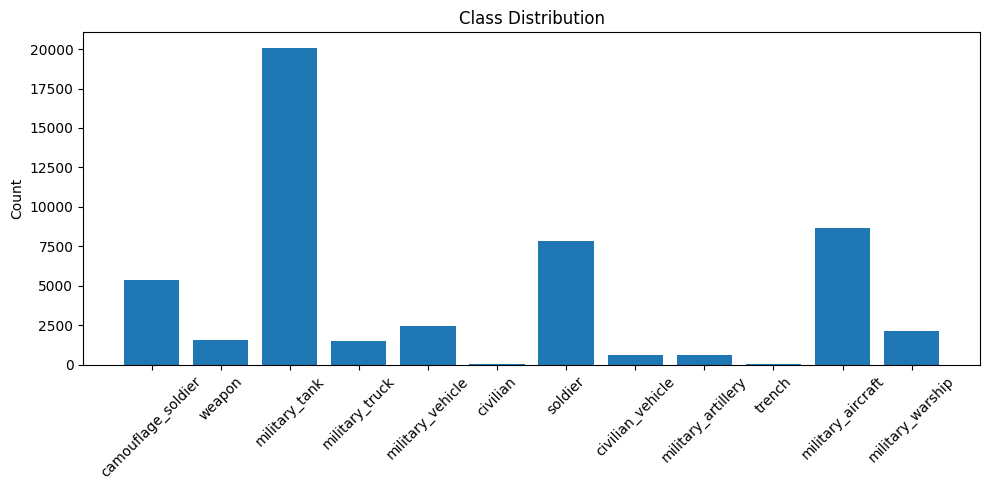

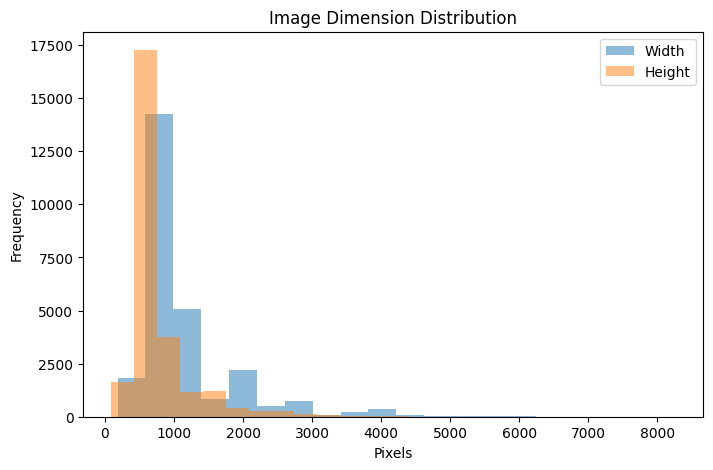

In [13]:
# Image count per split
print(f"Images: {img_counts}")
print(f"Objects: {obj_counts}")

# Class distribution
plt.figure(figsize=(10,5))
plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Image size distribution
widths, heights = zip(*img_sizes)
plt.figure(figsize=(8,5))
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()


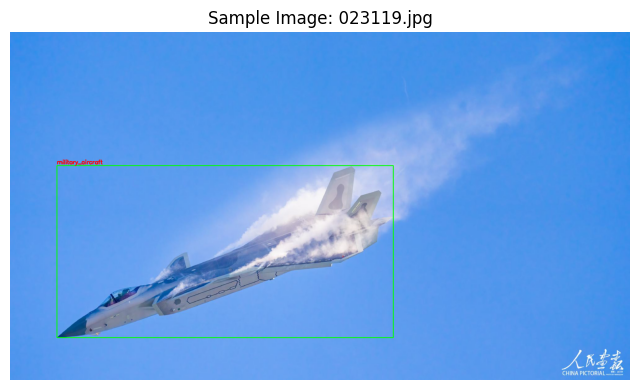

In [14]:
import random

def show_sample_image(split="val"):
    img_dir = os.path.join(base_path, split, "images")
    label_dir = os.path.join(base_path, split, "labels")
    imgs = [f for f in os.listdir(img_dir) if f.endswith(image_types)]

    sample = random.choice(imgs)
    img_path = os.path.join(img_dir, sample)
    label_path = os.path.join(label_dir, os.path.splitext(sample)[0] + ".txt")

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    if os.path.exists(label_path):
        labels = load_labels(label_path)
        for cls, xc, yc, bw, bh in labels:
            x1 = int((xc - bw/2) * w)
            y1 = int((yc - bh/2) * h)
            x2 = int((xc + bw/2) * w)
            y2 = int((yc + bh/2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(img, class_names[cls], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.title(f"Sample Image: {sample}")
    plt.axis('off')
    plt.show()

# Show sample
show_sample_image("val")


In [15]:
import os
from collections import defaultdict

# Update your base dataset path here
base_path = "/kaggle/input/militr/Military/military_object_dataset"
splits = ['train', 'val', 'test']

# Initialize counters
class_counts = {split: defaultdict(int) for split in splits}
total_classes = 12  # Set your total number of classes here

for split in splits:
    label_dir = os.path.join(base_path, split, "labels")
    label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

    for file in label_files:
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 1:
                    try:
                        class_id = int(parts[0])
                        class_counts[split][class_id] += 1
                    except ValueError:
                        continue  # Skip invalid lines

# Display results
for split in splits:
    print(f"\nClass counts in '{split}' split:")
    for cls_id in range(total_classes):
        print(f"Class {cls_id}: {class_counts[split].get(cls_id, 0)}")



Class counts in 'train' split:
Class 0: 4477
Class 1: 1210
Class 2: 17454
Class 3: 1245
Class 4: 1963
Class 5: 52
Class 6: 6502
Class 7: 519
Class 8: 439
Class 9: 4
Class 10: 7337
Class 11: 2134

Class counts in 'val' split:
Class 0: 510
Class 1: 358
Class 2: 1787
Class 3: 148
Class 4: 307
Class 5: 1
Class 6: 745
Class 7: 42
Class 8: 117
Class 9: 3
Class 10: 1063
Class 11: 0

Class counts in 'test' split:
Class 0: 389
Class 1: 0
Class 2: 818
Class 3: 96
Class 4: 194
Class 5: 0
Class 6: 560
Class 7: 25
Class 8: 50
Class 9: 37
Class 10: 236
Class 11: 0


In [11]:
metrics = model.val()
metrics.confusion_matrix.plot()


Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 264.9¬±212.4 MB/s, size: 487.3 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:04<00:00, 607.33it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 184/184 [00:34<00:00,  5.32it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081      0.852      0.544        0.6      0.419
    camouflage_soldier        385        510      0.838      0.763      0.822      0.477
                weapon        222        358       0.85      0.659      0.725      0.563
         military_tank        938       1787      0.845      0.879      0.885      0.649
        military_truck         84        148      0.724      0.669       0.65      0.407
      military_vehicle        149        307      0.689      0.491      0.608      0.458
              civilian          1          1          1          0    0.00642    0.00128
               soldier        420        745      0.835      0.726      0.795      0.551
      civilian_vehicle         18         42      0.822      0.381      0.519      0.296
    military_artillery         85        117      0.836      0.565      0.681      0.472
                trench          1          3          1          0          0          0
     military_aircraf

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [11]:
# Menu ‚Üí "Restart & Clear Output"


In [12]:
!pip uninstall -y ultralytics torch torchvision torchaudio numpy scipy pandas
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics==8.0.196
!pip install numpy==1.26.4 scipy==1.11.4 pandas==2.2.2


Found existing installation: ultralytics 8.0.196
Uninstalling ultralytics-8.0.196:
  Successfully uninstalled ultralytics-8.0.196
Found existing installation: torch 2.8.0
Uninstalling torch-2.8.0:
  Successfully uninstalled torch-2.8.0
Found existing installation: torchvision 0.23.0
Uninstalling torchvision-0.23.0:
  Successfully uninstalled torchvision-0.23.0
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scipy 1.16.1
Uninstalling scipy-1.16.1:
  Successfully uninstalled scipy-1.16.1
Found existing installation: pandas 2.3.1
Uninstalling pandas-2.3.1:
  Successfully uninstalled pandas-2.3.1
Looking in indexes: https://download.pytorch.org/whl/cu118
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [13]:
# 1Ô∏è‚É£ Install fresh
!pip uninstall -y ultralytics
!pip install ultralytics --no-cache-dir

# 2Ô∏è‚É£ Train YOLOv8l without touching torch.load or overriding anything
from ultralytics import YOLO

# Load the large YOLOv8 model
model = YOLO("yolov8l.pt")

# Train it
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    project="military_yolo8l_final",
    name="exp_yolov8l",
    exist_ok=True,
    lr0=0.00025,
    mosaic=0.7,
    mixup=0.15,
    hsv_h=0.012,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=0.1,
    scale=0.4,
    shear=0.15,
    perspective=0.0
)


Found existing installation: ultralytics 8.0.196
Uninstalling ultralytics-8.0.196:
  Successfully uninstalled ultralytics-8.0.196
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 192.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 270.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.8/16.8 MB 239.0 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

RecursionError: maximum recursion depth exceeded

In [12]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/kaggle/working/military_yolo8m_final1/exp_resume_final1/weights/epoch7.pt")  # Change path if needed

# Continue training for 30 more epochs
model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",  # Your dataset config
    epochs=30,  # 30 more epochs
    resume=False,
    pretrained=True,  # Use the weights of last.pt as pretrained
    project="military_yolo8m_final2",
    name="exp_resume_final2",
    exist_ok=True,
    save_period=1,
    lr0=0.00025,  # even slower learning rate for fine-tuning
    mosaic=0.7,
    mixup=0.15,
    hsv_h=0.012,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=0.1,
    scale=0.4,
    shear=0.15,
    perspective=0.0,
)


Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.1, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.012, hsv_s=0.5, hsv_v=0.3, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00025, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=/kaggle/working/military_yolo8m_final1/exp_resume_final1/weights/epoch7.pt, momentum=0.937, mosaic=0.7, multi_scale=False, name=exp_resume_final2, nbs=64, nms=False, opset=None, optimize=False, op

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:31<00:00, 698.80it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 169.8¬±165.4 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:03<00:00, 844.68it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to military_yolo8m_final2/exp_resume_final2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00025' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final2/exp_resume_final2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.58G     0.8563     0.7557      1.132         54        416:  13%|‚ñà‚ñé        | 176/1374 [00:46<05:15,  3.80it/s]


KeyboardInterrupt: 

In [13]:
model = YOLO("//kaggle/input/wowwww/best (2).pt")

model.train(
    data="/kaggle/working/fixed_military_dataset.yaml",
    epochs=35,  # much safer
    pretrained=True,
    resume=False,  # set True if you're resuming exact same exp
    project="military_yolo8m_final3",
    name="exp_resume_final3",
    exist_ok=True,
    save_period=1,
    
    # Optimized training settings
    lr0=0.0005,
    mosaic=0.0,     # reduce
    mixup=0.0,      # reduce
    fliplr=0.3,
    hsv_h=0.015,
    hsv_s=0.5,
    hsv_v=0.4,
    degrees=0.1,
    scale=0.2,
    shear=0.1,
    perspective=0.0,
    
    patience=4,
    cos_lr=True,
    optimizer="SGD",  # or AdamW if you're already using it
    label_smoothing=0.1,
)


WARNING ‚ö†Ô∏è 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.1, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=35, erasing=0.4, exist_ok=True, fliplr=0.3, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=//kaggle/input/wowwww/best (2).pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=exp_resume_final3, nbs=64, 

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:25<00:00, 874.45it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 163.9¬±181.9 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:03<00:00, 907.92it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to military_yolo8m_final3/exp_resume_final3/labels.jpg... 
optimizer: SGD(lr=0.0005, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final3/exp_resume_final3
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      4.08G     0.5943     0.3232     0.9267         63        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:11<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.24it/s]


                   all       2941       5081      0.847      0.535      0.595      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      4.59G     0.5886     0.3155     0.9223         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.25it/s]

                   all       2941       5081      0.739      0.549      0.595      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      4.62G     0.5828     0.3135     0.9205         13        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.26it/s]

                   all       2941       5081      0.853      0.542      0.596      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      4.65G     0.5797     0.3109     0.9176         13        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.25it/s]

                   all       2941       5081      0.754      0.549      0.597      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      4.71G     0.5714     0.3067     0.9137         13        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.25it/s]


                   all       2941       5081      0.834       0.54      0.592      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      4.74G     0.5632     0.3032     0.9128         14        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.27it/s]

                   all       2941       5081      0.855      0.537      0.596      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35       4.8G     0.5578     0.3007     0.9088         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.29it/s]

                   all       2941       5081      0.749      0.549      0.592      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      5.05G      0.554     0.2979     0.9058         12        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.26it/s]


                   all       2941       5081      0.762      0.541      0.596      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35       5.1G      0.549     0.2961     0.9026         22        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.23it/s]

                   all       2941       5081       0.85       0.54      0.597       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.14G     0.5454      0.291     0.9006         12        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.22it/s]

                   all       2941       5081      0.853       0.54      0.595      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      5.19G     0.5393     0.2904     0.8985         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.24it/s]

                   all       2941       5081      0.848       0.54      0.593      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.23G     0.5355     0.2874     0.8962         15        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.24it/s]

                   all       2941       5081      0.857      0.534      0.594      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      5.28G     0.5316      0.286     0.8937         23        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [06:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.25it/s]

                   all       2941       5081      0.852      0.537      0.592      0.417
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 9, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



13 epochs completed in 1.400 hours.
Optimizer stripped from military_yolo8m_final3/exp_resume_final3/weights/last.pt, 52.0MB
Optimizer stripped from military_yolo8m_final3/exp_resume_final3/weights/best.pt, 52.0MB

Validating military_yolo8m_final3/exp_resume_final3/weights/best.pt...
Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.04it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081       0.85      0.539      0.597       0.42
    camouflage_soldier        385        510      0.839      0.765      0.824      0.472
                weapon        222        358      0.837      0.648      0.722       0.56
         military_tank        938       1787      0.847      0.878      0.885      0.652
        military_truck         84        148      0.766      0.628      0.673      0.423
      military_vehicle        149        307      0.689      0.485      0.599      0.459
              civilian          1          1          1          0          0          0
               soldier        420        745      0.835      0.726      0.797      0.556
      civilian_vehicle         18         42      0.807      0.405      0.496      0.284
    military_artillery         85        117      0.788      0.556      0.664      0.471
                trench          1          3          1          0          0          0
     military_aircraf

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c97d303c490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [ ]:
from ultralytics import YOLO

# Load the last trained model
model = YOLO("/kaggle/input/wowwww/last (5).pt")  # Replace with correct path

# Continue training and save every epoch
model.train(
    data="/kaggle/working/fixed1_military_dataset.yaml",
    epochs=75,
    resume=False,
    pretrained=True,
    project="military_yolo8m_final",
    name="exp_125_to_200",
    exist_ok=True,
    save=True,
    save_period=1,  # ‚úÖ Save weights after every epoch
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.2,
    scale=0.5,
    shear=0.2,
    perspective=0.0,
)


Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed1_military_dataset.yaml, degrees=0.2, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=/kaggle/input/wowwww/last (5).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_125_to_200, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:27<00:00, 803.25it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 179.6¬±133.5 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:03<00:00, 794.54it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to military_yolo8m_final/exp_125_to_200/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final/exp_125_to_200
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      3.31G     0.9149     0.7728       1.15         93        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:45<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.863      0.529       0.61      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      3.94G     0.9203     0.7552      1.142         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.52it/s]


                   all       2941       5081      0.837       0.54      0.585      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      3.99G     0.9797     0.8335      1.168         25        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.714      0.497      0.544      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      4.03G      1.078     0.9582      1.222         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.47it/s]


                   all       2941       5081      0.612      0.503      0.549      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      4.08G      1.095      0.977      1.237         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.35it/s]


                   all       2941       5081      0.598      0.468      0.515      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      4.11G      1.097     0.9812      1.238         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]

                   all       2941       5081      0.605      0.511      0.555      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      4.16G      1.092     0.9738      1.235         73        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.53it/s]


                   all       2941       5081      0.677      0.501      0.544      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      4.42G       1.09      0.968      1.234         48        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]


                   all       2941       5081      0.699      0.502      0.549      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      4.47G      1.087     0.9643      1.233         49        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.33it/s]

                   all       2941       5081      0.795      0.503       0.56      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      4.51G      1.087     0.9589      1.234         51        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.23it/s]


                   all       2941       5081      0.579       0.53      0.551      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      4.56G      1.081     0.9487       1.23         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]


                   all       2941       5081      0.595      0.526      0.567      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75       4.6G      1.075     0.9387      1.229         76        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.28it/s]


                   all       2941       5081      0.681      0.526      0.554      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      4.65G      1.072     0.9341      1.223         44        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]


                   all       2941       5081       0.72      0.504      0.567       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75       4.9G      1.067     0.9222       1.22         58        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.688      0.522      0.571       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      4.93G      1.047     0.8683       1.19         47        416:   5%|‚ñå         | 69/1374 [00:16<05:10,  4.20it/s]

In [20]:
from ultralytics import YOLO

# Load your best checkpoint
model = YOLO("/kaggle/working/military_yolo8m_final/exp_125_to_200/weights/best.pt")  # update path

# Continue training
model.train(
    data="/kaggle/working/fixed1_military_dataset.yaml",
    epochs=50,
    pretrained=True,
    resume=False,
    project="military_yolo8m_final",
    name="exp_continue_bestpt_50",
    exist_ok=True,
    save_period=1,  # Save each epoch
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.2,
    scale=0.5,
    shear=0.2,
    perspective=0.0
)


Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed1_military_dataset.yaml, degrees=0.2, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=/kaggle/working/military_yolo8m_final/exp_125_to_200/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_continue_bestpt_50, nbs=64, nms=False, opset=None, optimize=False, optimi

train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [00:31<00:00, 695.21it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 175.0¬±139.1 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:04<00:00, 722.99it/s]

WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.


Plotting labels to military_yolo8m_final/exp_continue_bestpt_50/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final/exp_continue_bestpt_50
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.13G     0.8782      0.675      1.115         93        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:44<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.32it/s]


                   all       2941       5081       0.66      0.541        0.6       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.31G     0.9012     0.6927      1.124         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:35<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]


                   all       2941       5081      0.755      0.549      0.594      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.35G      0.948      0.765      1.148         25        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.34it/s]


                   all       2941       5081      0.623      0.533      0.578      0.383


Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.55G      1.032     0.8762      1.195         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]


                   all       2941       5081       0.72      0.523      0.568      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.12G      1.047     0.8921      1.206         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]

                   all       2941       5081      0.592        0.5      0.549      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.12G       1.05     0.8977      1.202         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.46it/s]


                   all       2941       5081      0.615      0.508      0.558       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.12G      1.044     0.8933      1.204         73        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.628      0.501      0.567      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.12G      1.044     0.8871      1.195         48        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]


                   all       2941       5081      0.807      0.509      0.556      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.12G      1.041     0.8826      1.196         49        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.46it/s]


                   all       2941       5081      0.597      0.528      0.566      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.15G      1.037     0.8821      1.199         51        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]

                   all       2941       5081      0.711      0.511       0.57      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.21G      1.031     0.8697      1.195         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]


                   all       2941       5081      0.823      0.519      0.582      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.24G      1.023     0.8589      1.186         76        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]


                   all       2941       5081      0.707      0.534      0.573       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.29G       1.02     0.8577       1.19         44        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]


                   all       2941       5081      0.752       0.51      0.585      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.69G      1.014     0.8423      1.182         58        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]

                   all       2941       5081      0.759      0.514      0.585      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.74G      1.014     0.8384      1.183         57        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.43it/s]


                   all       2941       5081        0.6      0.541      0.571      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.78G      1.005     0.8304      1.177         59        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.819      0.531      0.577      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.83G     0.9982     0.8213      1.175         66        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.37it/s]


                   all       2941       5081      0.772      0.514       0.59        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.87G     0.9929     0.8113      1.169         63        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]


                   all       2941       5081      0.805      0.555      0.588      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.93G     0.9847     0.8054      1.172         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]

                   all       2941       5081      0.754      0.546      0.609      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.96G     0.9852     0.8019      1.166         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.47it/s]


                   all       2941       5081      0.748      0.545      0.605      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.01G     0.9784     0.7949      1.165         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]

                   all       2941       5081      0.738      0.539      0.594      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.42G     0.9712     0.7813      1.161         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:31<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]


                   all       2941       5081      0.847       0.54      0.599      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.48G     0.9637     0.7782      1.158         40        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]


                   all       2941       5081      0.746      0.563      0.609      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.51G     0.9611     0.7747      1.155         57        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:32<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.25it/s]


                   all       2941       5081      0.845      0.543      0.602      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.56G     0.9445     0.7592      1.148         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.30it/s]


                   all       2941       5081      0.757      0.543      0.599      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.81G     0.9453     0.7553      1.149         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]


                   all       2941       5081      0.647      0.542      0.595       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.87G     0.9384     0.7476      1.145         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.29it/s]

                   all       2941       5081      0.671      0.531      0.597      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.9G     0.9282     0.7375      1.136         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]


                   all       2941       5081      0.752      0.537      0.599      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.96G     0.9311     0.7341      1.136         55        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]

                   all       2941       5081      0.646      0.559      0.606       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.21G     0.9232     0.7248      1.131         47        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.34it/s]


                   all       2941       5081      0.671      0.544      0.605      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.26G       0.92     0.7209      1.133         47        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.30it/s]


                   all       2941       5081      0.765      0.538      0.603      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.29G     0.9071     0.7049      1.123         75        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]


                   all       2941       5081      0.758      0.548      0.605      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.35G     0.9013     0.7035      1.125         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]


                   all       2941       5081      0.762      0.547      0.609      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.61G     0.9012     0.6962       1.12         28        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]


                   all       2941       5081      0.755      0.552      0.608      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.65G     0.8911      0.691       1.12         60        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]

                   all       2941       5081      0.756      0.561      0.608      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.69G      0.889     0.6888      1.116         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.28it/s]


                   all       2941       5081      0.754      0.556      0.605      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.74G     0.8893     0.6845      1.116         48        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.48it/s]


                   all       2941       5081      0.764      0.551      0.603      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.78G     0.8895     0.6851      1.112         44        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.37it/s]


                   all       2941       5081      0.762      0.553      0.603      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.84G     0.8711     0.6675      1.107         30        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.46it/s]


                   all       2941       5081      0.766      0.557      0.606      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.08G     0.8711     0.6666      1.107         42        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:33<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]


                   all       2941       5081       0.77      0.554      0.605      0.422
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.14G     0.6743     0.3879      0.971         21        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]


                   all       2941       5081       0.77      0.552      0.607      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.17G     0.6599     0.3728     0.9614         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.40it/s]

                   all       2941       5081      0.754      0.554      0.602      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.22G     0.6459      0.363     0.9522         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.42it/s]

                   all       2941       5081      0.752      0.556      0.603      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         5G     0.6356     0.3562     0.9467         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]


                   all       2941       5081      0.752      0.558      0.603      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         5G     0.6226     0.3463      0.942         27        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.44it/s]

                   all       2941       5081      0.749      0.561      0.603      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         5G     0.6104     0.3374     0.9366         15        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.45it/s]

                   all       2941       5081       0.75       0.56      0.603      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         5G     0.6008     0.3295     0.9344         24        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.48it/s]


                   all       2941       5081      0.752      0.557      0.603      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         5G     0.5911     0.3225     0.9288         19        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]


                   all       2941       5081      0.754      0.556      0.602      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         5G     0.5793     0.3139     0.9252         16        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.28it/s]


                   all       2941       5081      0.754      0.556      0.602      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         5G     0.5756     0.3098      0.923         11        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:29<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.54it/s]

                   all       2941       5081      0.759      0.552      0.605      0.423



50 epochs completed in 4.915 hours.
Optimizer stripped from military_yolo8m_final/exp_continue_bestpt_50/weights/last.pt, 52.0MB
Optimizer stripped from military_yolo8m_final/exp_continue_bestpt_50/weights/best.pt, 52.0MB

Validating military_yolo8m_final/exp_continue_bestpt_50/weights/best.pt...
Ultralytics 8.3.172 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.03it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2941       5081      0.752      0.557      0.603      0.424
    camouflage_soldier        385        510       0.87      0.774       0.83      0.476
                weapon        222        358      0.841      0.665      0.727      0.558
         military_tank        938       1787      0.839      0.891      0.893      0.655
        military_truck         84        148       0.74      0.713      0.684      0.425
      military_vehicle        149        307      0.682      0.517      0.634      0.473
              civilian          1          1          0          0    0.00905    0.00181
               soldier        420        745      0.819       0.73      0.793      0.551
      civilian_vehicle         18         42      0.699      0.429      0.451      0.255
    military_artillery         85        117       0.84      0.537      0.681      0.509
                trench          1          3          1          0          0          0
     military_aircraf

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f02bf619cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [ ]:
from ultralytics import YOLO

# Load your best checkpoint
model = YOLO("/kaggle/input/dataset/epoch49.pt")  # update path

# Continue training
model.train(
    data="/kaggle/working/fixed1_military_dataset.yaml",
    epochs=60,
    pretrained=True,
    resume=False,
    project="military_yolo8m_final",
    name="exp_continue_bestpt_50-110",
    exist_ok=True,
    save_period=1,  # Save each epoch
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.2,
    scale=0.5,
    shear=0.2,
    perspective=0.0
)


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.173 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed1_military_dataset.yaml, degrees=0.2, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, ke


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 0.4¬±0.0 ms, read: 34.0¬±28.5 MB/s, size: 123.9 KB)


train: Scanning /kaggle/input/militr/Military/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21978/21978 [01:03<00:00, 347.61it/s]


WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/militr/Military/military_object_dataset/train is not writeable, cache not saved.
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 33.3¬±23.6 MB/s, size: 113.2 KB)


val: Scanning /kaggle/input/militr/Military/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2941/2941 [00:08<00:00, 357.02it/s]


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/militr/Military/military_object_dataset/val is not writeable, cache not saved.
Plotting labels to military_yolo8m_final/exp_continue_bestpt_50-110/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to military_yolo8m_final/exp_continue_bestpt_50-110
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.83G     0.8241     0.6194      1.087         93        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:54<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.99it/s]

                   all       2941       5081      0.779      0.526      0.594      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      3.99G     0.8535     0.6416      1.093         39        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.35it/s]


                   all       2941       5081      0.724      0.536      0.576      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      4.03G     0.9121      0.724      1.123         25        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.29it/s]


                   all       2941       5081      0.716      0.501      0.548      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      4.07G      1.016     0.8535      1.177         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.30it/s]


                   all       2941       5081      0.704      0.512      0.563      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      4.12G      1.036     0.8808      1.198         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.28it/s]


                   all       2941       5081      0.622      0.482      0.525      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      4.16G      1.044     0.8884      1.197         43        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.30it/s]


                   all       2941       5081      0.687      0.503      0.545      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      4.21G      1.039     0.8854        1.2         73        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]

                   all       2941       5081       0.68      0.529      0.563      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      4.25G      1.042     0.8855      1.198         48        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:26<00:00,  3.46it/s]

                   all       2941       5081      0.747      0.478      0.556      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60       4.3G       1.04     0.8832        1.2         49        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.34it/s]


                   all       2941       5081      0.817       0.49      0.549      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      4.34G      1.038     0.8792        1.2         51        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.32it/s]

                   all       2941       5081      0.818      0.498      0.561      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      4.39G       1.03     0.8723      1.193         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.32it/s]

                   all       2941       5081      0.608      0.533      0.581      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      4.42G      1.023     0.8587      1.191         76        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.30it/s]


                   all       2941       5081      0.614      0.526      0.564       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      4.48G      1.022     0.8564      1.185         44        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.41it/s]


                   all       2941       5081       0.72      0.513      0.569      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      4.51G      1.017     0.8445      1.185         58        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.35it/s]


                   all       2941       5081      0.741      0.525      0.578      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      4.57G      1.016     0.8389      1.186         57        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]

                   all       2941       5081      0.714      0.529       0.57      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60       4.6G       1.01     0.8362      1.185         59        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.29it/s]


                   all       2941       5081      0.843      0.525      0.573      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      4.66G      1.001     0.8269      1.177         66        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.32it/s]


                   all       2941       5081      0.806      0.531      0.583      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      4.91G     0.9981     0.8207      1.174         63        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.36it/s]

                   all       2941       5081      0.805       0.55      0.595      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      4.96G     0.9887     0.8192      1.173         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.18it/s]


                   all       2941       5081      0.722      0.552      0.588      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60         5G     0.9928     0.8128      1.171         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:23<00:00,  3.95it/s]


                   all       2941       5081      0.735      0.536       0.59      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      5.05G     0.9845     0.8041      1.168         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.25it/s]


                   all       2941       5081      0.737      0.541      0.599      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      5.31G     0.9766     0.7907      1.163         33        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]

                   all       2941       5081      0.748      0.551      0.597      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      5.36G     0.9752     0.7911      1.162         40        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.35it/s]

                   all       2941       5081      0.741      0.555      0.597      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      5.39G     0.9726     0.7864      1.161         57        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]


                   all       2941       5081      0.726       0.56      0.596      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      5.45G     0.9584     0.7734      1.155         32        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]


                   all       2941       5081      0.745      0.568      0.603      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      5.48G     0.9587     0.7738      1.155         45        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.38it/s]

                   all       2941       5081      0.756      0.562       0.61      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      5.54G      0.957     0.7683      1.157         29        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:42<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.40it/s]

                   all       2941       5081      0.752       0.55      0.605      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      5.74G      0.943     0.7616       1.15         36        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.32it/s]

                   all       2941       5081      0.657      0.546      0.602      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      5.79G     0.9487     0.7575      1.144         55        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.39it/s]


                   all       2941       5081      0.725      0.561      0.604      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      6.19G     0.9392     0.7537      1.141         47        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:22<00:00,  4.15it/s]


                   all       2941       5081       0.72      0.661      0.646      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      6.24G     0.9398     0.7452      1.146         47        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.34it/s]

                   all       2941       5081      0.754      0.557      0.615      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      6.28G     0.9288     0.7334      1.139         75        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]


                   all       2941       5081      0.778      0.546      0.615      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      6.34G     0.9252     0.7279      1.134         34        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:20<00:00,  4.40it/s]


                   all       2941       5081       0.74      0.558      0.611      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      6.37G     0.9253     0.7275      1.134         28        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.31it/s]


                   all       2941       5081      0.749      0.561      0.616      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      6.42G     0.9157     0.7181      1.132         60        416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1374/1374 [05:43<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92/92 [00:21<00:00,  4.35it/s]


                   all       2941       5081      0.737      0.568      0.614      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      6.66G     0.9139     0.7174      1.131         61        416:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1180/1374 [04:55<00:48,  4.03it/s]

In [1]:
pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 16.4 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 67.5 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 62.0 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00

In [3]:
import torch
from ultralytics import YOLO
from ultralytics.nn.tasks import DetectionModel

# Path to your checkpoint
CHECKPOINT = "/kaggle/input/finalli/epoch99.pt"

# 1) Allowlist DetectionModel so torch can unpickle YOLO checkpoint
torch.serialization.add_safe_globals([DetectionModel])

# 2) Load checkpoint
ckpt = torch.load(CHECKPOINT, map_location="cpu", weights_only=False)

# 3) Patch epochs correctly
extra_epochs = 50
if "train_args" in ckpt:
    ckpt["train_args"]["epochs"] = ckpt["train_args"].get("epochs", 99) + extra_epochs
if "args" in ckpt:
    ckpt["args"]["epochs"] = ckpt["args"].get("epochs", 99) + extra_epochs

# 4) Save patched checkpoint
torch.save(ckpt, "patched_epoch99.pt")

# 5) Load with Ultralytics YOLO
model = YOLO("patched_epoch99.pt")

# Get new epoch target safely
new_epochs = (
    ckpt.get("train_args", {}).get("epochs")
    or ckpt.get("args", {}).get("epochs")
    or (99 + extra_epochs)
)

# ‚úÖ Correct training call (no 'hyp' bug)
model.train(
    data="coco128.yaml",     # <-- replace with your dataset.yaml
    epochs=new_epochs,       # continue for 50 more
    resume=True,
    save=True,
    save_period=1,
    augment=True,            # enable built-in augmentations
    lr0=0.001,               # tweak learning rate if needed
    imgsz=640,               # training image size
    degrees=10,              # random rotation
    translate=0.1,           # translation
    scale=0.5,               # random scaling
    shear=2,                 # shear
    flipud=0.5,              # vertical flip
    fliplr=0.5,              # horizontal flip
    mosaic=1.0,              # enable mosaic augmentation
    mixup=0.2                # enable mixup augmentation
)


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.193 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, k

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x790b5cc04190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [3]:
import torch
from ultralytics import YOLO
from ultralytics.nn.tasks import DetectionModel
import numpy as np

# -------------------------------
# üìå Path to your last checkpoint
# -------------------------------
CHECKPOINT = "/kaggle/input/lasttttt/epoch149.pt"

# Allowlist DetectionModel
torch.serialization.add_safe_globals([DetectionModel])

# Load checkpoint
ckpt = torch.load(CHECKPOINT, map_location="cpu", weights_only=False)

# Extend training (149 ‚Üí 200)
extra_epochs = 50
if "train_args" in ckpt:
    ckpt["train_args"]["epochs"] = ckpt["train_args"].get("epochs", 149) + extra_epochs
if "args" in ckpt:
    ckpt["args"]["epochs"] = ckpt["args"].get("epochs", 149) + extra_epochs

torch.save(ckpt, "patched_epoch149.pt")

# -------------------------------
# üìå Load model
# -------------------------------
model = YOLO("patched_epoch149.pt")

# -------------------------------
# ‚öñÔ∏è Class Weights (only for ref ‚Äî YOLOv8 does not accept directly!)
# -------------------------------
class_counts = np.array([4477,1210,17454,1245,1963,52,6502,519,439,4,7337,2134])
total = class_counts.sum()
class_weights = total / (len(class_counts) * class_counts)
class_weights = class_weights / class_weights.sum()
print("Class Weights (for analysis):", class_weights)

# -------------------------------
# üìå Supported Hyperparameters (YOLOv8/YOLO11)
# -------------------------------
hyp = {
    "lr0": 0.002,          # initial learning rate
    "lrf": 0.01,           # final learning rate fraction
    "momentum": 0.937,
    "weight_decay": 0.0005,
    "warmup_epochs": 3.0,
    "warmup_momentum": 0.8,
    "warmup_bias_lr": 0.1,

    # Augmentations
    "hsv_h": 0.015,
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "degrees": 15,
    "translate": 0.15,
    "scale": 0.6,
    "shear": 5,
    "perspective": 0.0005,
    "flipud": 0.5,
    "fliplr": 0.5,
    "mosaic": 1.0,
    "mixup": 0.3,
    "copy_paste": 0.1,
}

# -------------------------------
# ‚úÖ Resume Training (200 epochs total)
# -------------------------------
model.train(
    data="your_dataset.yaml",  # <-- replace with your dataset.yaml
    epochs=200,
    resume=True,
    save=True,
    save_period=1,
    imgsz=640,
    optimizer="SGD",
    cos_lr=True,
    cache=True,
    rect=False,
    close_mosaic=10,
    dropout=0.05,
    amp=True,
    **hyp
)


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Class Weights (for analysis): [ 0.00080749   0.0029877  0.00020712   0.0029037   0.0018416    0.069522  0.00055601   0.0069656    0.008235     0.90379  0.00049273   0.0016941]
Ultralytics 8.3.195 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fixed_military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, eras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ede1786d590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.